# Customer Churn Analysis

**Project Overview:**  
This project analyzes a bank company's customer dataset to understand patterns in customer churn.  
The goal is to explore the data, visualize trends, and identify factors that may influence customer churn.  

**Key Steps in This Notebook:**  
1. Load and inspect the dataset  
2. Clean and prepare the data  
3. Conduct exploratory data analysis (EDA)  
4. Visualize patterns and insights  
5. Summarize key findings

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [6]:
# Load dataset
df = pd.read_csv('Bank_Customer_Churn.csv')

# Pull first 5 rows
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Inspect dataset

# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
# Summary statistics
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# Check for missing values
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

# Overall Churn Rate

In [10]:
# Calculate churn rate
churn_rate = df['churn'].value_counts(normalize=True)
print(churn_rate)

churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64


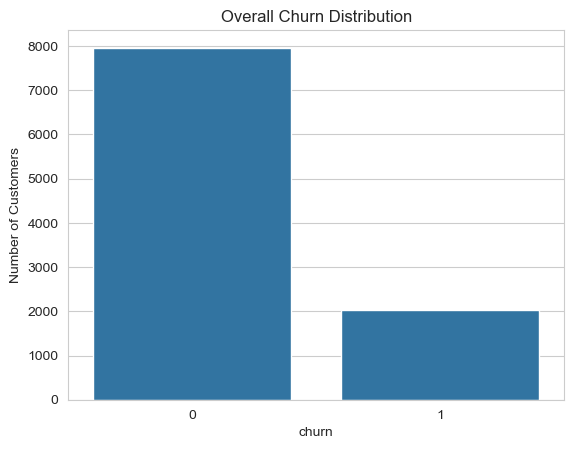

In [12]:
# Plot
sns.countplot(x='churn', data=df)
plt.title('Overall Churn Distribution')
plt.ylabel('Number of Customers')
plt.show()

# Churn by Demographics
Analyze based on gender and age

In [14]:
# Churn rate by gender
churn_by_gender = df.groupby('gender')['churn'].mean()
print(churn_by_gender)

gender
Female    0.250715
Male      0.164559
Name: churn, dtype: float64


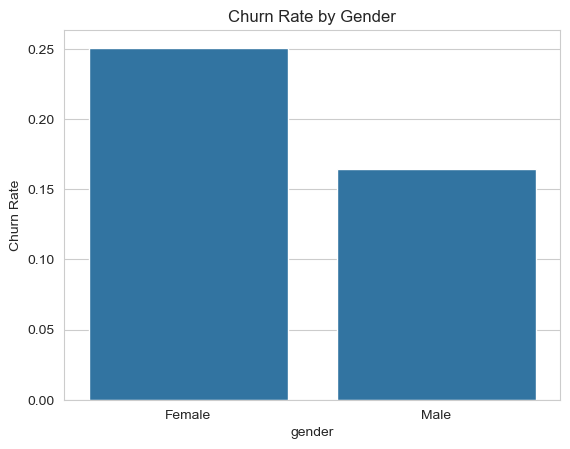

In [15]:
# Plot
sns.barplot(x=churn_by_gender.index, y=churn_by_gender.values)
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Gender')
plt.show()

In [17]:
# Churn rate by age
churn_by_age = df.groupby('age')['churn'].mean()
print(churn_by_age)

age
18    0.090909
19    0.037037
20    0.050000
21    0.056604
22    0.142857
        ...   
83    0.000000
84    0.500000
85    0.000000
88    0.000000
92    0.000000
Name: churn, Length: 70, dtype: float64


In [19]:
# Churn rate by age group
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-99']
df['AgeGroup'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

churn_by_agegroup = df.groupby('AgeGroup')['churn'].mean()
print(churn_by_agegroup)

AgeGroup
18-24    0.074703
25-34    0.084980
35-44    0.196199
45-54    0.505721
55-64    0.483209
65-74    0.155251
75-84    0.023810
85-99    0.000000
Name: churn, dtype: float64


C:\Users\Hope\AppData\Local\Temp\ipykernel_25988\1516041654.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_agegroup = df.groupby('AgeGroup')['churn'].mean()


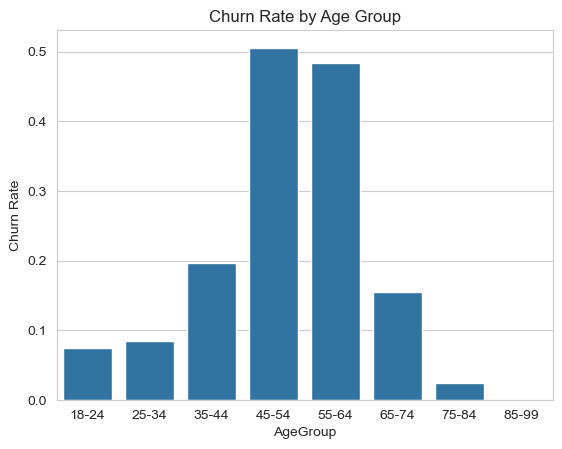

In [20]:
# Plot
sns.barplot(x=churn_by_agegroup.index, y=churn_by_agegroup.values)
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age Group')
plt.show()

# Churn by Credit Score

In [22]:
# Churn rate by credit score
churn_by_credit_score = df.groupby('credit_score')['churn'].mean()
print(churn_by_credit_score)

credit_score
350    1.000000
351    1.000000
358    1.000000
359    1.000000
363    1.000000
         ...   
846    0.400000
847    0.333333
848    0.000000
849    0.250000
850    0.184549
Name: churn, Length: 460, dtype: float64


In [25]:
# Churn rate by credit group
credit_bins = [350, 450, 550, 650, 750, 850]
credit_labels = ['350-449', '450-549', '550-649', '650-749', '750-850']
df['CreditGroup'] = pd.cut(df['credit_score'], bins=credit_bins, labels=credit_labels)

churn_by_credit_score = df.groupby('CreditGroup')['churn'].mean()
print(churn_by_credit_score)

CreditGroup
350-449    0.304348
450-549    0.214385
550-649    0.207780
650-749    0.192496
750-850    0.195870
Name: churn, dtype: float64


C:\Users\Hope\AppData\Local\Temp\ipykernel_25988\4007104000.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_credit_score = df.groupby('CreditGroup')['churn'].mean()


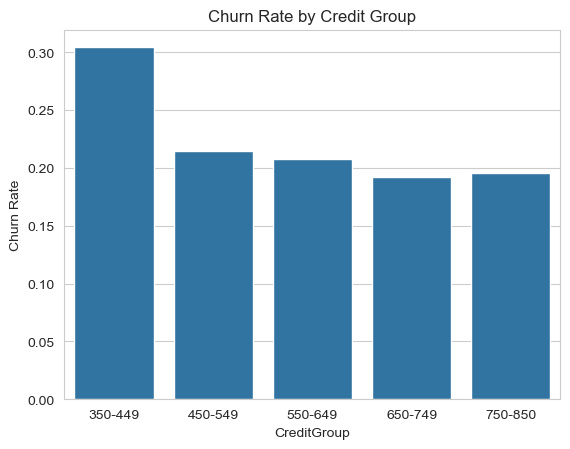

In [26]:
# Plot
sns.barplot(x=churn_by_credit_score.index, y=churn_by_credit_score.values)
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Credit Group')
plt.show()

# Churn by Country

In [28]:
# Churn rate by country
churn_by_country = df.groupby('country')['churn'].mean()
print(churn_by_country)

country
France     0.161548
Germany    0.324432
Spain      0.166734
Name: churn, dtype: float64


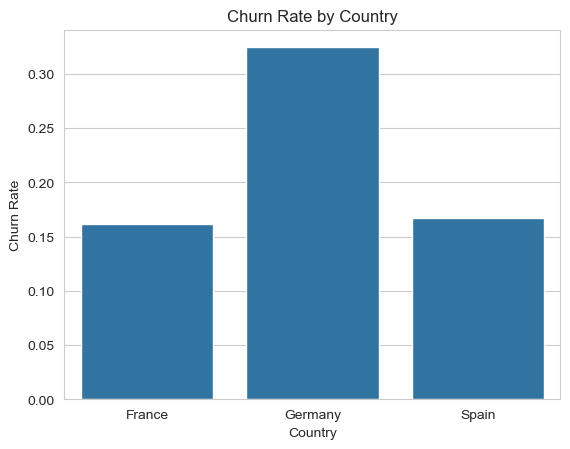

In [30]:
# Plot
sns.barplot(x=churn_by_country.index, y=churn_by_country.values)
plt.xlabel('Country')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Country')
plt.show()

# Churn by Tenure

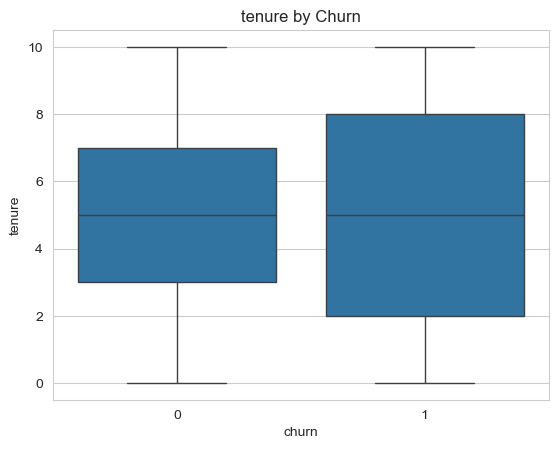

In [32]:
#boxplot
numeric_cols = ['tenure']
for col in numeric_cols:
    sns.boxplot(x='churn', y=col, data=df)
    plt.title(f'{col} by Churn')
    plt.show()

# Churn by Balance

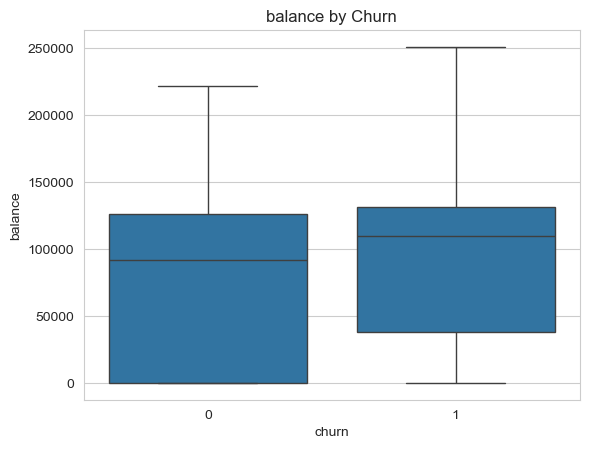

In [34]:
#boxplot
numeric_cols = ['balance']
for col in numeric_cols:
    sns.boxplot(x='churn', y=col, data=df)
    plt.title(f'{col} by Churn')
    plt.show()

# Churn by Estimated Salary

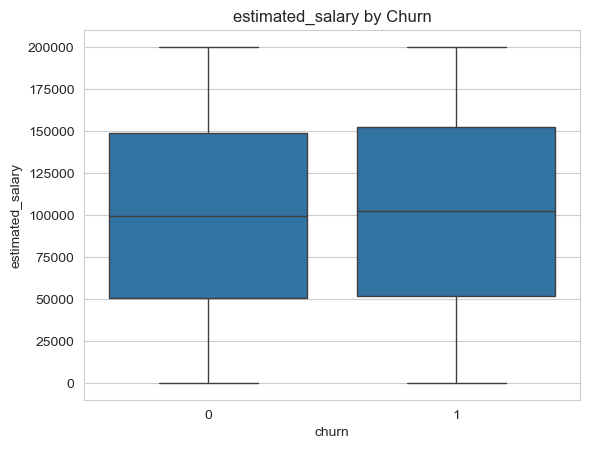

In [35]:
#boxplot
numeric_cols = ['estimated_salary']
for col in numeric_cols:
    sns.boxplot(x='churn', y=col, data=df)
    plt.title(f'{col} by Churn')
    plt.show()

# Churn by Products Number

In [36]:
# Churn rate by products number
churn_by_productsnumber = df.groupby('products_number')['churn'].mean()
print(churn_by_productsnumber)

products_number
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: churn, dtype: float64


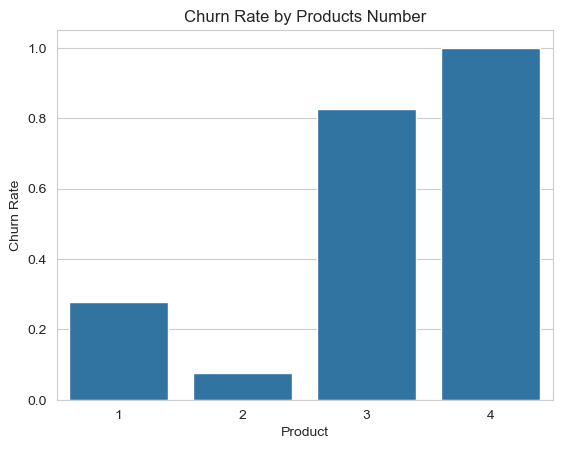

In [38]:
# Plot
sns.barplot(x=churn_by_productsnumber.index, y=churn_by_productsnumber.values)
plt.xlabel('Product')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Products Number')
plt.show()

# Churn by Credit Card

In [39]:
# Churn rate by credit card
churn_by_creditcard = df.groupby('credit_card')['churn'].mean()
print(churn_by_creditcard)

credit_card
0    0.208149
1    0.201843
Name: churn, dtype: float64


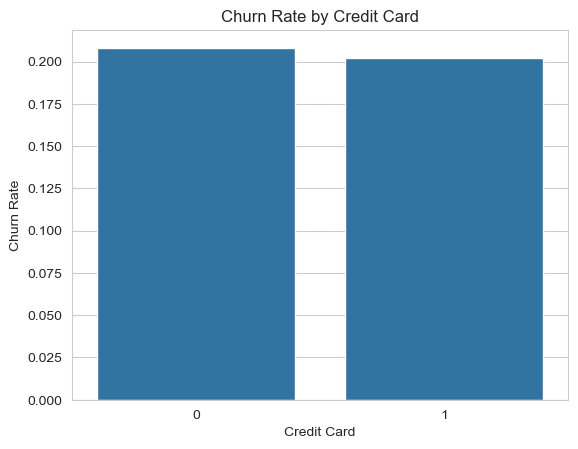

In [40]:
# Plot
sns.barplot(x=churn_by_creditcard.index, y=churn_by_creditcard.values)
plt.xlabel('Credit Card')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Credit Card')
plt.show()

# Churn by Active Member

In [41]:
# Churn rate by active member
churn_by_activemember = df.groupby('active_member')['churn'].mean()
print(churn_by_activemember)

active_member
0    0.268509
1    0.142691
Name: churn, dtype: float64


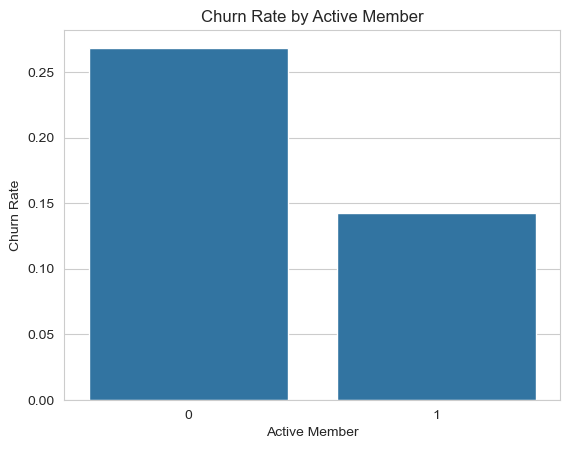

In [42]:
# Plot
sns.barplot(x=churn_by_activemember.index, y=churn_by_activemember.values)
plt.xlabel('Active Member')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Active Member')
plt.show()

## Insights & Solution Suggestions

Insights
- Around 1 in every 5 customers is currently churning
- Female customers are more likely to churn
- age groups 45-54 and 55-64 are most likely to churn and have highest rates 
- Customers with credit scores on the lowest ends are more likely to churn
- Germany has the most customers churning currently
- Customers with slightly higher balances are churning more frequently
- Customers utilizing products 3 and 4 are more likely to churn
- Non-active customers are churning more frequently than active customers
  
Solution Suggestions
- Investigate and survey female customers aged 45-64 to understand why they are churning more frequently
- Advertise to potential customers with higher credit scores
- Offer incentives for German customers to continue services
- Research into what is lacking in products 3 and 4 and why these are potentially causing more churn
- Conduct target marketing to non-active customers to promote them to active customers 